# Visualization Demo

### Plotting an example data
This tutorial shows how to visualize an example data on Jupyter Notebook. This is not a general demo and can be used for any application. 

In [1]:
# Import all the necessary packages
import numpy as np
import nibabel as nib
from ipywidgets import interact
import matplotlib.pyplot as plt
%matplotlib inline

Here we read `T1w` and `T2w` MRI from one of the training instances.

One quick santiy check is to ensure both input images (here `t1w` and `t2w`) have the same matrix size.

In [2]:
# define path to your example data
mri_dir = "Data/example/"

# define images you would like to view
mri_1 = "t1w.nii.gz"
mri_2 = "t2w.nii.gz"

# load images
t1w_nib = nib.load(mri_dir+mri_1)
t2w_nib = nib.load(mri_dir+mri_2)

# print image size
print(f'T1w size:',t1w_nib.shape)
print(f'T2w size:',t2w_nib.shape)

# Image to matrix
t1w_data = t1w_nib.get_fdata()
t2w_data = t2w_nib.get_fdata()

T1w size: (260, 311, 260)
T2w size: (260, 311, 260)


## Visualize a random axial slice
Here we use matplotlib to show a random axial slice image of the example data. 

We plotted both images and an additional plot that shows the subtraction of these images. A reason to show the subtract image is to check if the images are aligned. If the images were in different spatial spaces, the subtract image will show the mis-alignment. Note that this is a rough qualitative check. Users are encouraged to perform required preprocessing to co-register input images. 

Plotting axial slice 128


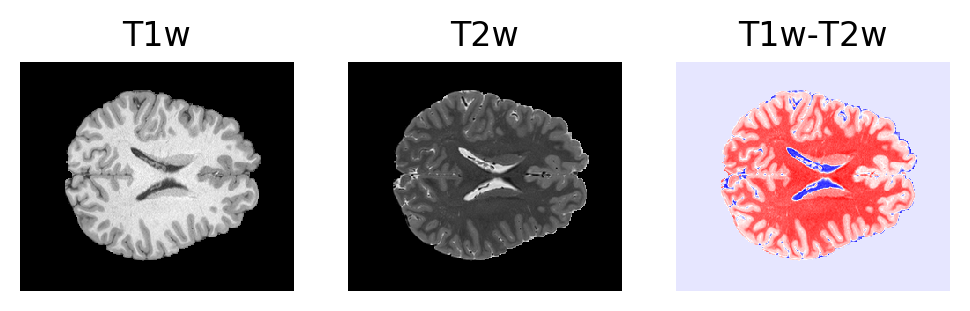

In [3]:
# Select random slice number
# +/- 50 are added to increase the change of choosing a slice in the middle of the brain
maxval = t1w_nib.shape[2]
k = np.random.randint(0+50, maxval-50)

# show slice
print("Plotting axial slice",k)
fig = plt.figure(dpi=200)
ax1 = fig.add_subplot(131)
plt.imshow(t1w_data[:, :, k], cmap='gray')
plt.title('T1w')
plt.axis('off');

ax1 = fig.add_subplot(132)
plt.imshow(t2w_data[:, :, k], cmap='gray')
plt.title('T2w')
plt.axis('off');

ax1 = fig.add_subplot(133)
plt.imshow(t1w_data[:,:,k]-t2w_data[:, :, k], cmap='bwr')
plt.title('T1w-T2w')
plt.axis('off');

## Scroll through the example image

In [4]:
# Define a function to visualize the data
def scroll_mri(k):
    fig = plt.figure(figsize=(10, 5))
    ax1 = fig.add_subplot(121)
    plt.imshow(t1w_data[:, :, k], cmap='gray')
    plt.axis('off')
    plt.title('T2w', fontsize=20)
    ax2 = fig.add_subplot(122)
    plt.imshow(t2w_data[:, :, k], cmap='gray');
    plt.title('T2w', fontsize=20)
    plt.axis('off')
    return k

interact(scroll_mri, k=(10, t1w_data.shape[2] - 50));

interactive(children=(IntSlider(value=110, description='k', max=210, min=10), Output()), _dom_classes=('widget…